In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat 



In [2]:
#进行数据读取
ex3data1=np.loadtxt('.\ex3data1.txt',delimiter=',')

X = ex3data1[:,0:400]
y = ex3data1[:,[400]]#注意存为列向量的写法
theta1=np.loadtxt('theta1.txt',delimiter=',')
theta2=np.loadtxt('theta2.txt',delimiter=',')

print(X.shape, y.shape, theta1.shape, theta2.shape)

(5000, 400) (5000, 1) (25, 401) (10, 26)


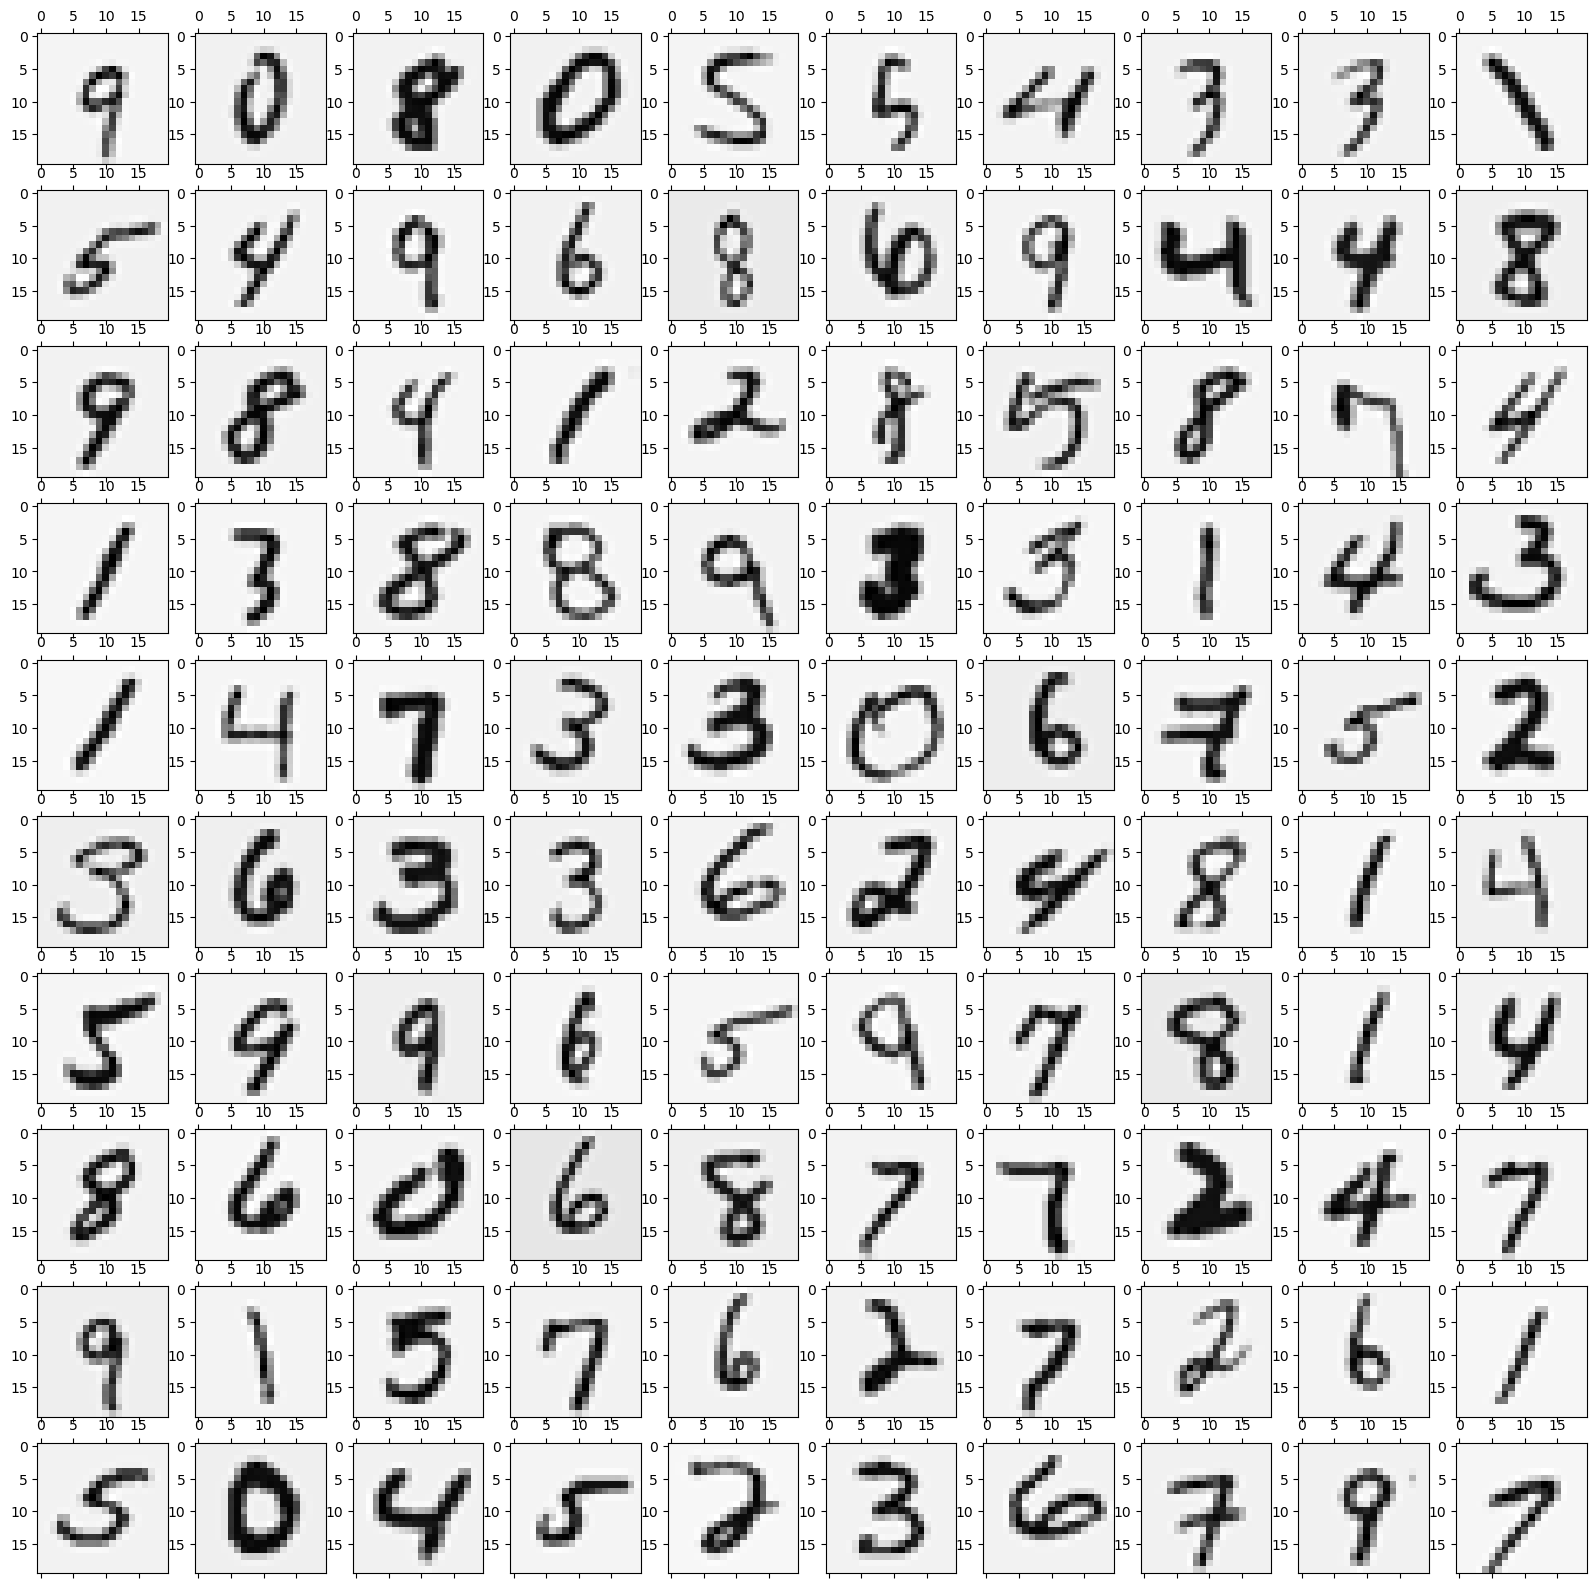

In [3]:
def displayData(x):
    indexs = np.random.choice(X.shape[0],100)
    images=x[indexs]
    fig,axs=plt.subplots(10,10,figsize=(20,20))
    for row in range(10):
        for col in range(10):
            axs[row,col].matshow(images[row*10+col].reshape(20,20).T,cmap='gray_r')
    plt.show()
    
displayData(X)


In [4]:
#定义sigmoid函数
def sigmoid(z):
    return (1.0/(1.0+np.exp(-z)))
#定义前向传播函数
def feedforward_propagation(X,Theta1,Theta2):

       # 输入层到隐藏层的计算
    a1 = np.insert(X, 0, 1)  # 添加偏置单元
    z2 = np.dot(Theta1, a1)
    a2 = sigmoid(z2)
    
    # 隐藏层到输出层的计算
    a2 = np.insert(a2, 0, 1)  # 添加偏置单元
    z3 = np.dot(Theta2, a2)
    a3 = sigmoid(z3)
    
    return a3
    
    
    
#定义预测函数
def predict(a3):
    #特别注意，label的范围是1~10，要记得给索引+1
    return np.argmax(a3)+1

In [5]:
#完成实际标签与预测标签的准确度对比的统计
def accuracy(X,y):
    sum_num = 0
    for i in range(y.size):
        if(y[i] == predict(feedforward_propagation(X[i],theta1,theta2))):
            sum_num += 1
    return sum_num/y.size
accuracy(X,y)

0.9752